## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 06

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def derivative_of_gaussian_kernels(size, sigma):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    
    kernel_gaussian = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel_gaussian = kernel_gaussian / np.sum(kernel_gaussian)

    kernel_dog_x = -(xx / np.square(sigma)) * kernel_gaussian
    kernel_dog_y = -(yy / np.square(sigma)) * kernel_gaussian
    
    return kernel_dog_x, kernel_dog_y

kernel_dog_x_5x5, kernel_dog_y_5x5 = derivative_of_gaussian_kernels(5, 2)

print("5x5 Derivative of Gaussian Kernel (X-direction):\n", kernel_dog_x_5x5)
print("\n5x5 Derivative of Gaussian Kernel (Y-direction):\n", kernel_dog_y_5x5)

5x5 Derivative of Gaussian Kernel (X-direction):
 [[ 0.01162342  0.00845599 -0.         -0.00845599 -0.01162342]
 [ 0.01691198  0.01230339 -0.         -0.01230339 -0.01691198]
 [ 0.01916378  0.01394157 -0.         -0.01394157 -0.01916378]
 [ 0.01691198  0.01230339 -0.         -0.01230339 -0.01691198]
 [ 0.01162342  0.00845599 -0.         -0.00845599 -0.01162342]]

5x5 Derivative of Gaussian Kernel (Y-direction):
 [[ 0.01162342  0.01691198  0.01916378  0.01691198  0.01162342]
 [ 0.00845599  0.01230339  0.01394157  0.01230339  0.00845599]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.00845599 -0.01230339 -0.01394157 -0.01230339 -0.00845599]
 [-0.01162342 -0.01691198 -0.01916378 -0.01691198 -0.01162342]]


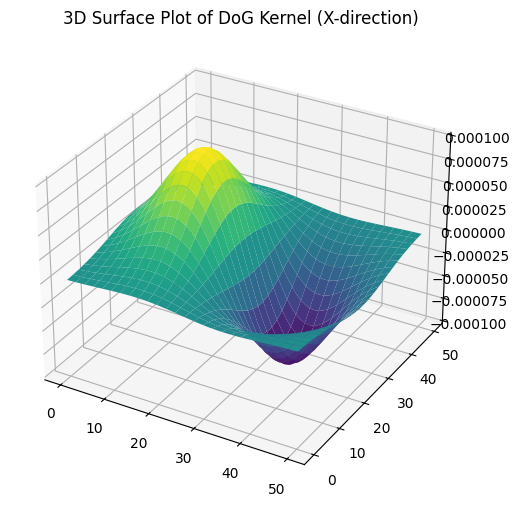

In [7]:
kernel_dog_x_51x51, _ = derivative_of_gaussian_kernels(51, 10)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 50, 51)
y = np.linspace(0, 50, 51)
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, kernel_dog_x_51x51, cmap='viridis')
plt.title('3D Surface Plot of DoG Kernel (X-direction)')
plt.show()

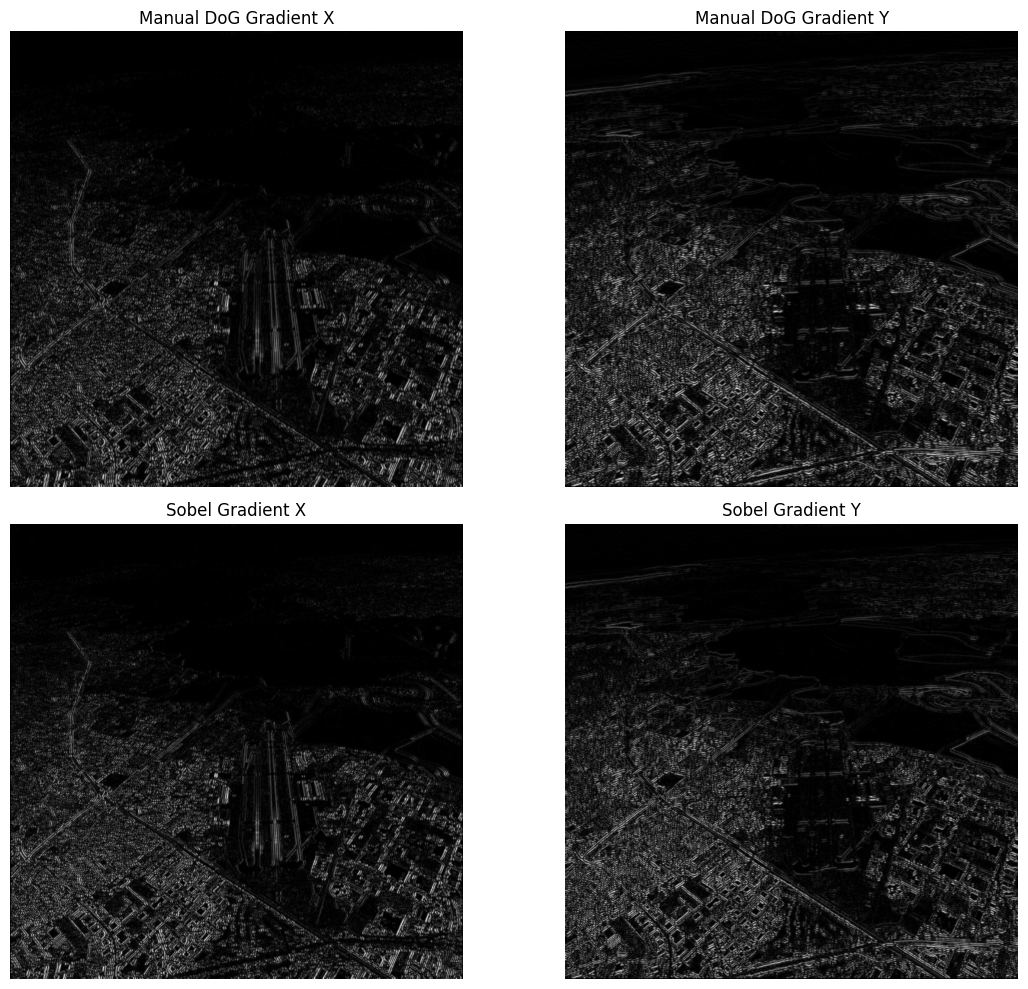

In [8]:
img_path = 'assets/runway.png'
if os.path.exists(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    grad_x_manual = cv2.filter2D(image, cv2.CV_64F, kernel_dog_x_5x5)
    grad_y_manual = cv2.filter2D(image, cv2.CV_64F, kernel_dog_y_5x5)

    grad_x_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    grad_y_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(np.abs(grad_x_manual), cmap='gray')
    plt.title('Manual DoG Gradient X')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(np.abs(grad_y_manual), cmap='gray')
    plt.title('Manual DoG Gradient Y')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(np.abs(grad_x_sobel), cmap='gray')
    plt.title('Sobel Gradient X')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(np.abs(grad_y_sobel), cmap='gray')
    plt.title('Sobel Gradient Y')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Error: File not found at {img_path}")